<a href="https://colab.research.google.com/github/GeorgeTelles/DY_por_setor/blob/main/An%C3%A1lise_setorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
  <img src="https://raw.githubusercontent.com/GeorgeTelles/georgetelles/f69531ec6b293b5148563588a764c010015d315e/logo_clara.png" alt="logo clara" width="300" style="display: inline-block; vertical-align: top; margin-right: 10px;">
  <img src="https://raw.githubusercontent.com/GeorgeTelles/georgetelles/f69531ec6b293b5148563588a764c010015d315e/logo_dark.png" alt="logo dark" width="300" style="display: inline-block; vertical-align: top;">
</div>

#**Análise setorial - um estudo de caso com dividendos**


## Descrição

O projeto **Análise Setorial - Um Estudo de Caso com Dividendos** tem como objetivo extrair e analisar dados de dividend yield das empresas listadas na Bolsa de Valores do Brasil (B3), segmentando-os por setor. Através dessa análise, buscamos entender como o rendimento de dividendos varia entre diferentes setores e identificar quais setores oferecem melhores retornos para investidores focados em dividendos.

## Etapas do Projeto

1. **Extração de Dados da Bolsa:** Coleta de informações relevantes sobre dividendos e cotações das ações das empresas listadas na B3.

2. **Refinamento dos Dados:** Processamento e limpeza dos dados para garantir a qualidade e a precisão das análises.

3. **Segmentação por Setor:** Classificação das empresas por setor e cálculo do dividend yield médio para cada setor.

4. **Análise Comparativa:** Comparação do dividend yield entre diferentes setores para identificar quais oferecem melhores retornos.

5. **Visualização dos Resultados:** Criação de gráficos e relatórios para apresentar os resultados da análise de forma clara e compreensível.

## Objetivo

O principal objetivo é fornecer uma visão detalhada do rendimento de dividendos por setor na B3, ajudando investidores a tomar decisões informadas baseadas na performance dos dividendos. Este estudo pode ser útil para aqueles que buscam maximizar o retorno dos seus investimentos em dividendos.


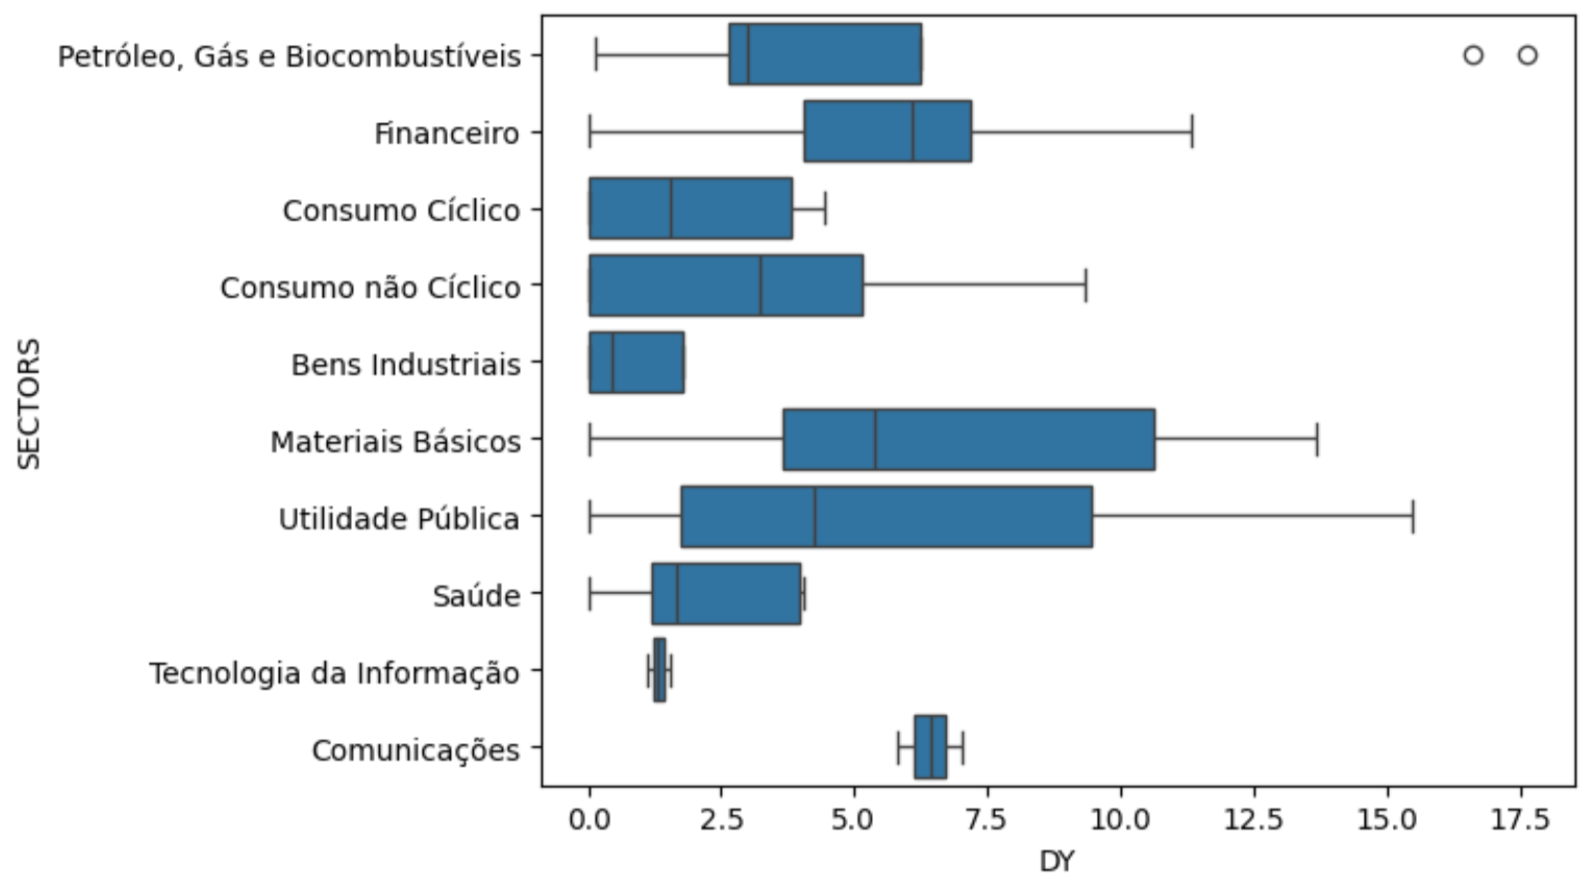

In [ ]:
!pip install tradingcomdados
import yfinance as yf
from tradingcomdados import alternative_data as ad

In [ ]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

**Função para obter dados dos Dividendos**

In [ ]:
def retorna_dy(ticker, date = 'today'):

  if date == 'today':
    end = datetime.now().strftime("%Y-%m-%d")
    start = (datetime.now() - relativedelta(years=1)).strftime("%Y-%m-%d")
  else:
    end = date
    start = (datetime.strptime(date, "%Y-%m-%d") - relativedelta(years=1)).strftime("%Y-%m-%d")

  ticker_sa = ticker + '.SA'
  papel = yf.Ticker(ticker_sa)
  dados = papel.history(start = start, end = end)

  soma_dividendos = sum(dados[dados.Dividends != 0].Dividends)
  preco_final = yf.download(ticker_sa, start = start, progress = False)['Adj Close'].iloc[-1]
  DY = soma_dividendos/preco_final

  return round(100*DY,2)

Criando minha lista de ativos: Neste caso as empresas que compõe o IBOV

In [ ]:
ibov = ad.index_composition('ibov', mode = 'list')

Obtendo os setores da Bolsa de Valores

In [ ]:
ad.get_sectors("B3")

In [ ]:
full_ibov = ad.get_sectors("B3",ibov)
full_ibov

Obtendo os dados de DY da minha lista de ativos.

In [ ]:
full_ibov['DY'] = full_ibov['ticker'].apply(retorna_dy)

In [ ]:
full_ibov = full_ibov.drop(columns=["SUBSECTORS", "SEGMENTS", "SEGMENT B3"])
full_ibov

Reorganizando as colunas

In [ ]:
full_ibov = full_ibov.iloc[:,[2,0,3]]
full_ibov = full_ibov.rename(columns = {'ticker':'STOCK'})
full_ibov

#Visualizando os dados

In [ ]:
sns.boxplot(data = full_ibov, x = 'DY', y = 'SECTORS')

In [ ]:
sns.swarmplot(data = full_ibov, x = 'DY', y = 'SECTORS')